In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

df=pd.read_csv("C:/Users/thand/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats.stats import pearsonr

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
#from sklearn.linear_model import regressor
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA


# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000


In [82]:
df.TotalCharges.dtypes

dtype('float64')

In [81]:
#encoding nominal variables
alist=['SeniorCitizen']
df=categoricalTreatment(df,alist,'NumericalEncoding')
#Numerical variables
df.TotalCharges= pd.to_numeric(df.TotalCharges, errors='coerce')
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols= df.select_dtypes(include=numerics).columns 
#cateogrical Variables
cat_cols= df.select_dtypes(exclude=numerics).columns
alist=['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
df=categoricalTreatment(df,alist,'NumericalEncoding')
#ordinal variable
#categorical encoding
df1=df
alist=['OnlineSecurity','Contract','InternetService','MultipleLines','OnlineBackup','DeviceProtection','PaymentMethod','TechSupport','StreamingTV','StreamingMovies']
df1=categoricalTreatment(df1,alist,'OneHotEncoding')
cat_cols2=df1.select_dtypes(exclude=numerics).columns

#categorical encoded Variables

In [46]:
cat_cols=cat_cols.tolist()
cat_cols.remove('customerID')
cat_cols.remove('Churn')
print(cat_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


In [47]:
cat_cols2=cat_cols2.tolist()
cat_cols2.remove('customerID')
cat_cols2.remove('Churn')
print(cat_cols2)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'PaperlessBilling', 'TotalCharges', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_No phone service', 'MultipleLines_No', 'MultipleLines_Yes', 'OnlineBackup_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'DeviceProtection_No', 'DeviceProtection_Yes', 'DeviceProtection_No internet service', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'TechSupport_No', 'TechSupport_Yes', 'TechSupport_No internet service', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingTV_No internet service', 'StreamingMovies_No', 'StreamingMovies_Yes', 'StreamingMovies_No internet service']


In [13]:
#Numerical Variables dsitribution
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

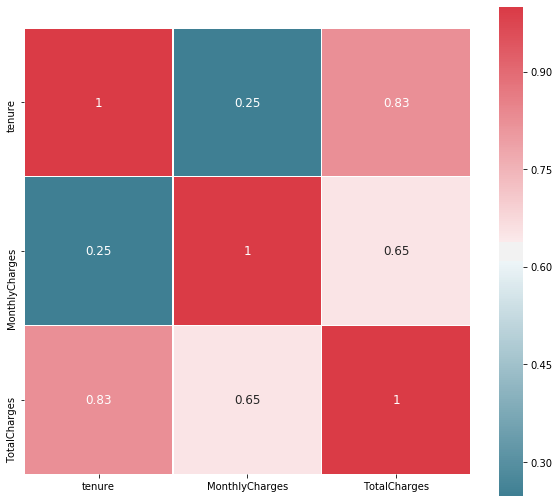

In [115]:
# Correlation
NumericalEDA('Heatmap',1,2,df,num_cols)

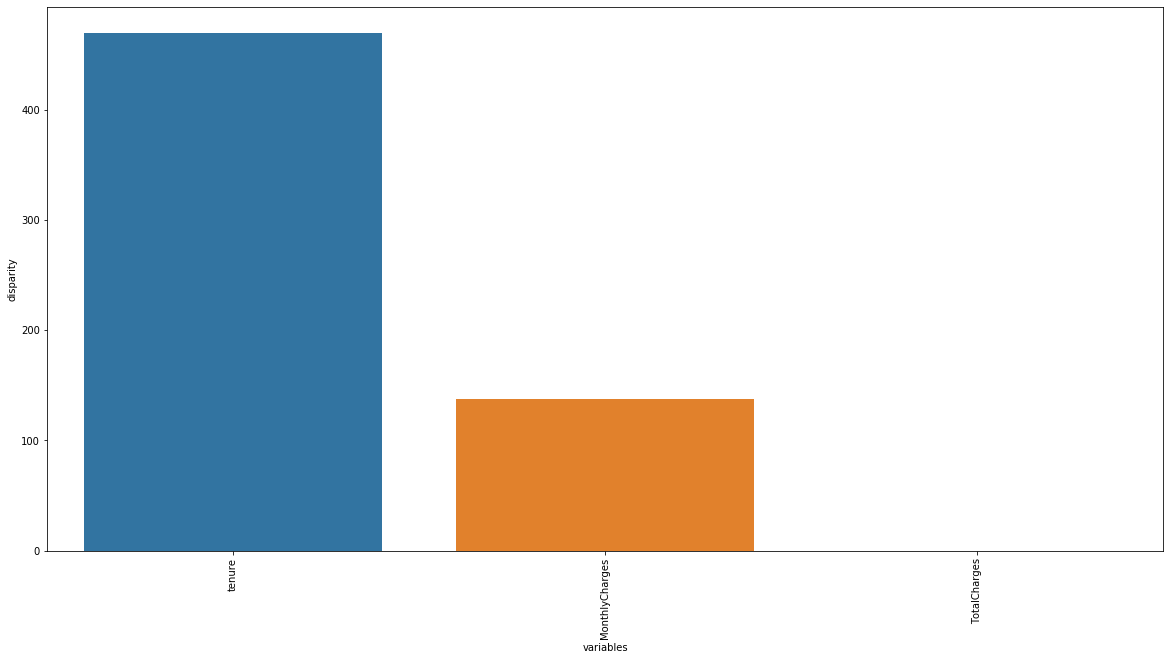

In [101]:
#Since there is only 3 numerical variables, we can run 1 way anova against all, if there are more then probably select 
# the top 5 correlated variables?

#1 way Anova test, Churn Vs Numerical Variables

categoricalEDA(df,what='dependent_variable',data=df,label='Churn',num_columns=num_cols,cat_columns=df[cat_cols].drop(columns=['customerID','Churn'],axis=1).columns,rows=8,cols=2)

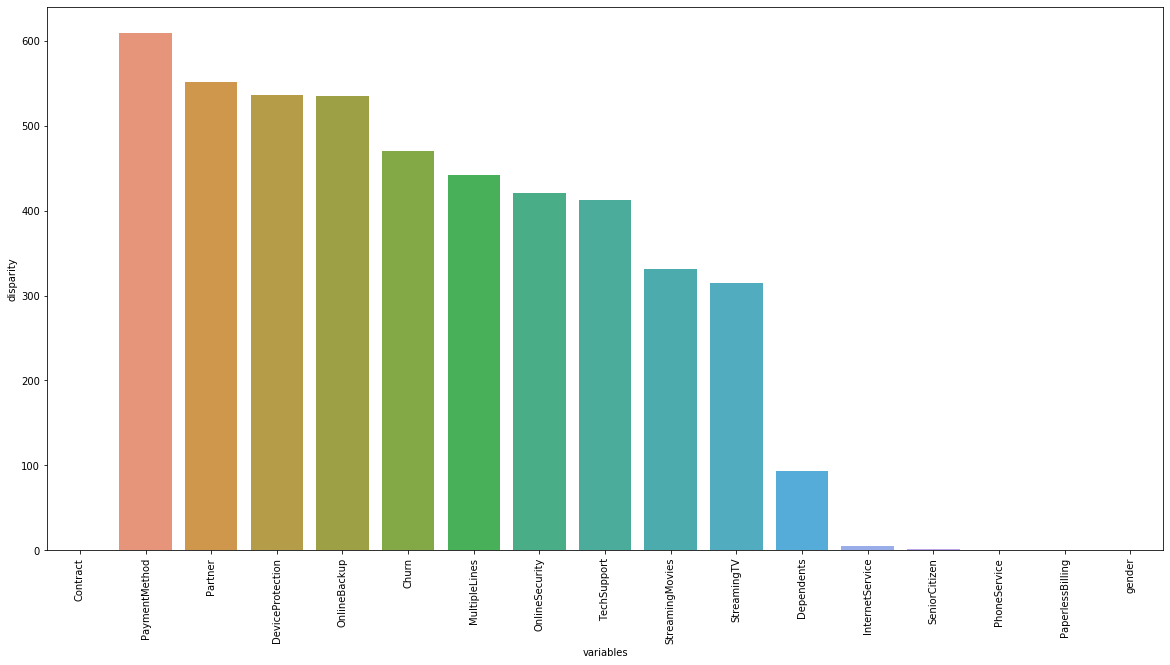

In [108]:
#tenure Vs Cat cols
categoricalEDA(df,what='independent_variable',data=df,label='Churn',num_columns=['tenure'],cat_columns=df[cat_cols].drop(columns=['customerID'],axis=1).columns,rows=8,cols=2)

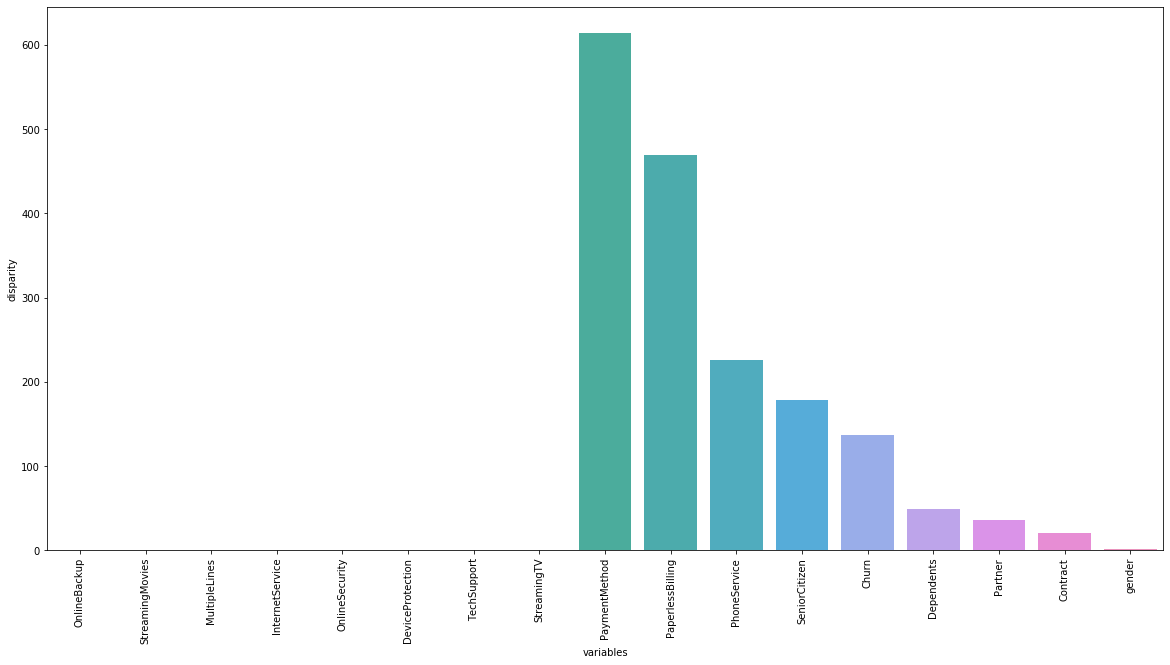

In [107]:
#Monthly Charges Vs Cat cols
categoricalEDA(df,what='independent_variable',data=df,label='Churn',num_columns=['MonthlyCharges'],cat_columns=df[cat_cols].drop(columns=['customerID'],axis=1).columns,rows=8,cols=2)

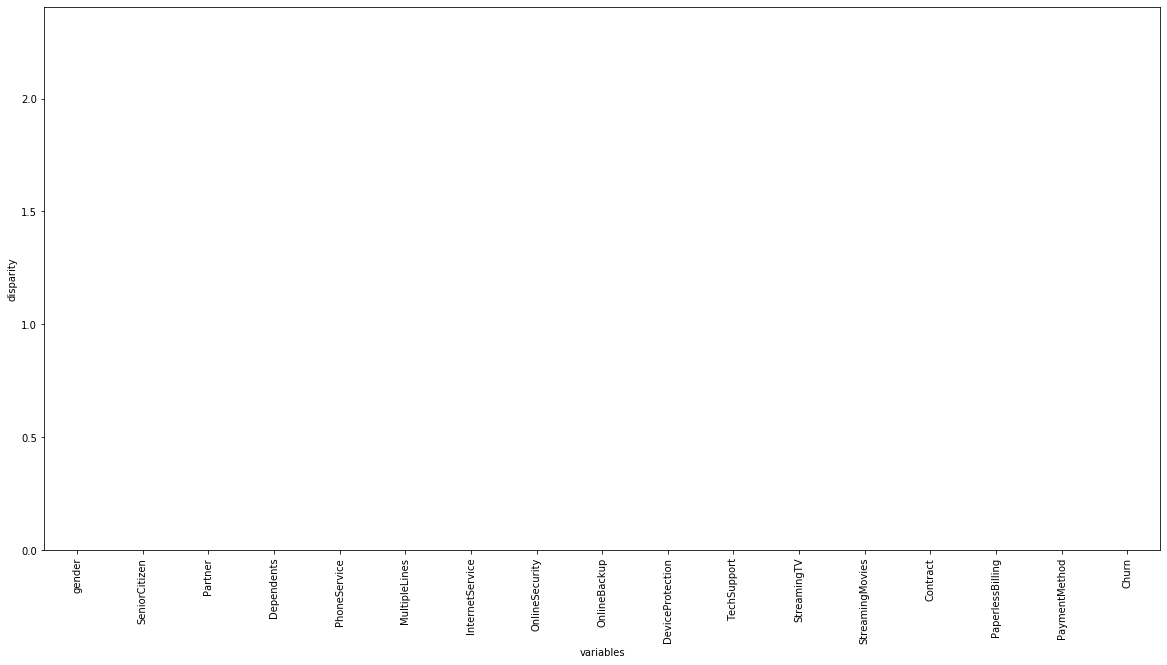

In [106]:
#Monthly Charges Vs Cat cols
categoricalEDA(df,what='independent_variable',data=df,label='Churn',num_columns=['TotalCharges'],cat_columns=df[cat_cols].drop(columns=['customerID'],axis=1).columns,rows=8,cols=2)

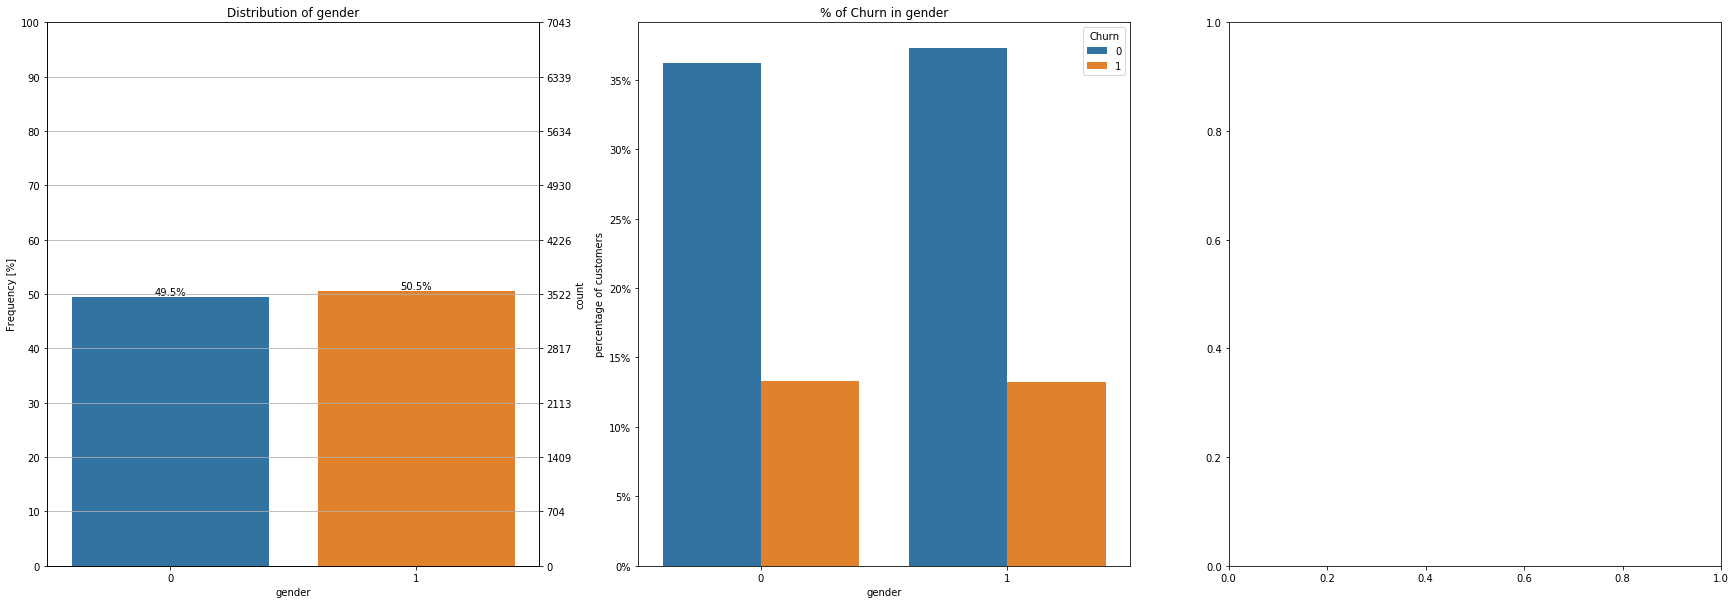

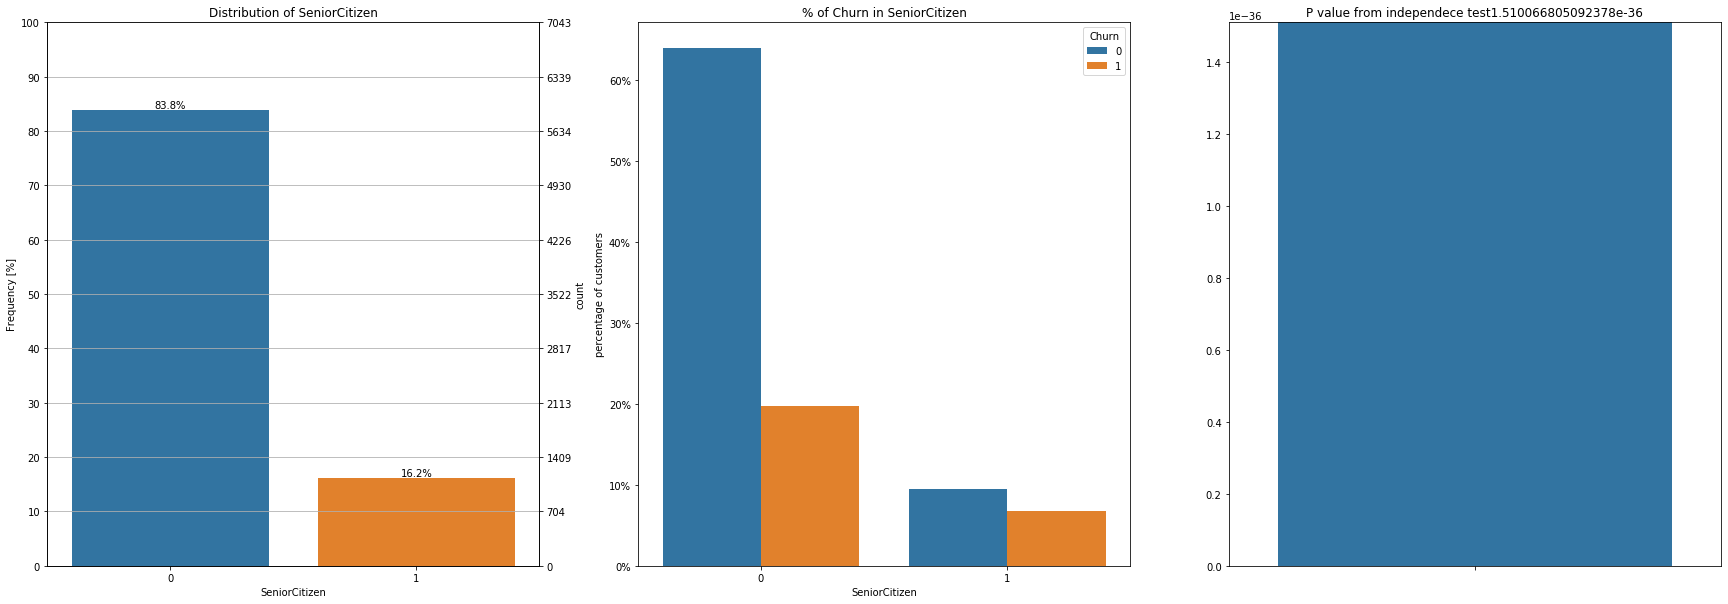

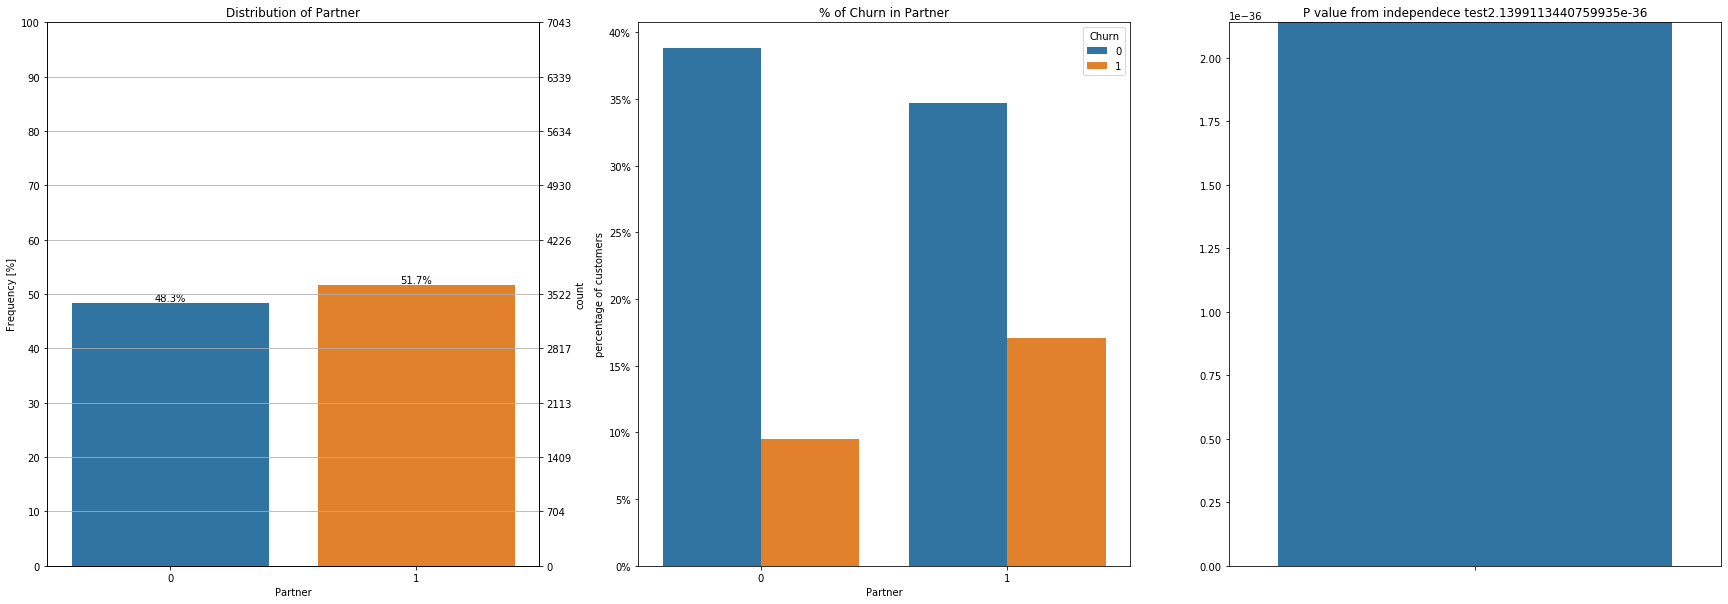

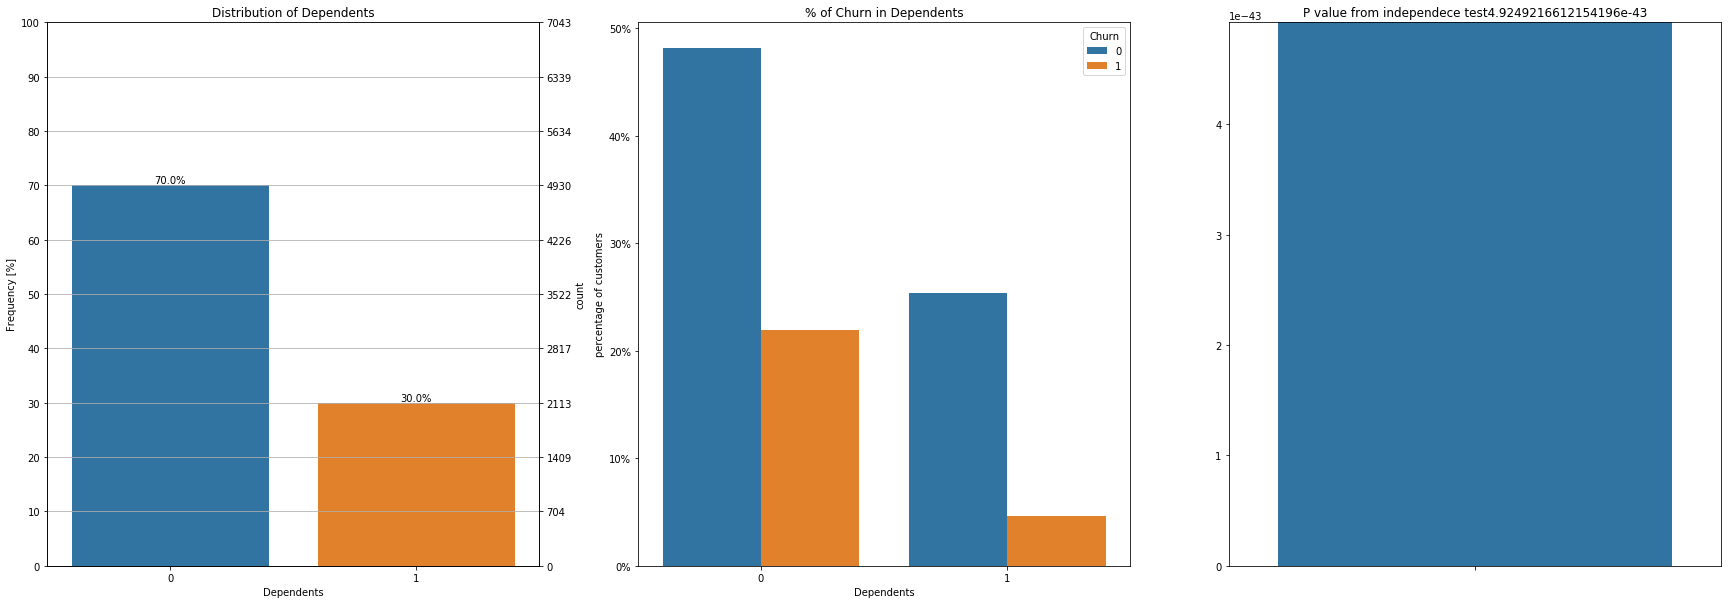

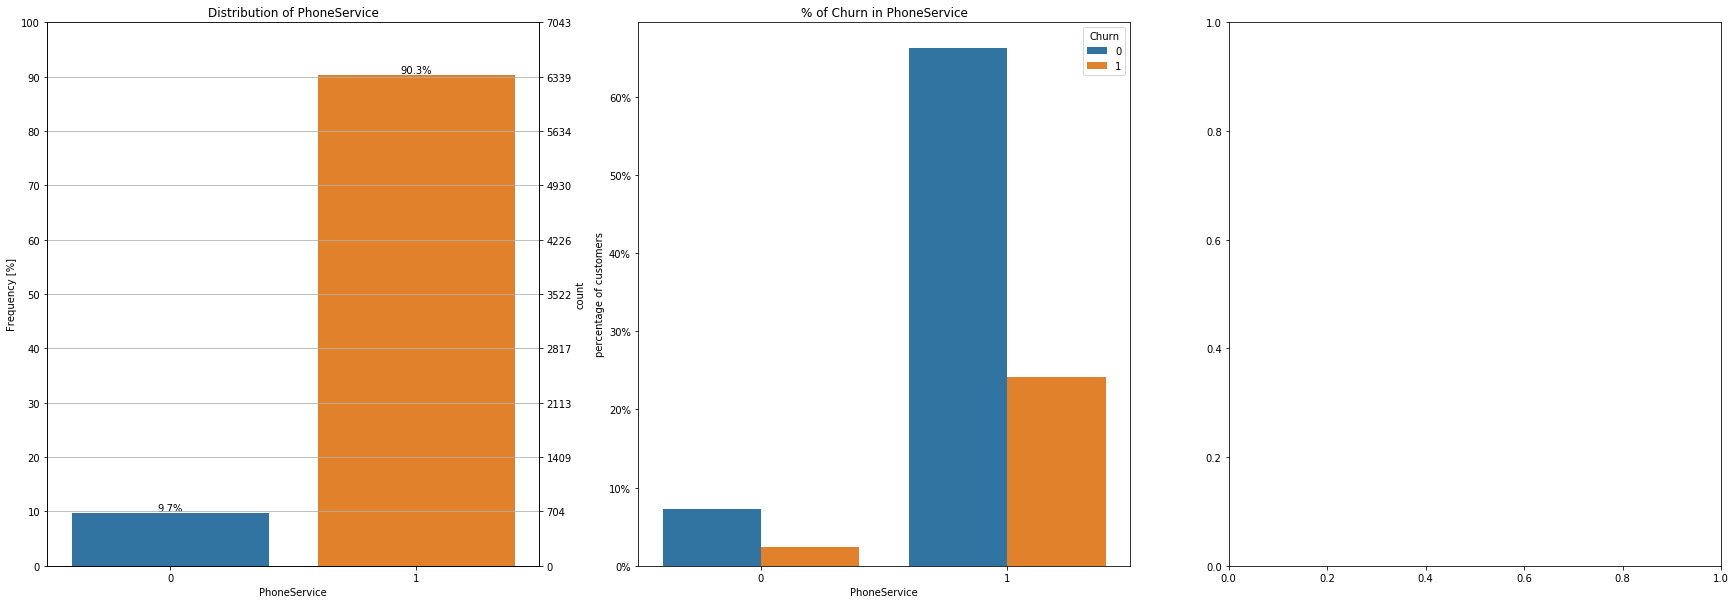

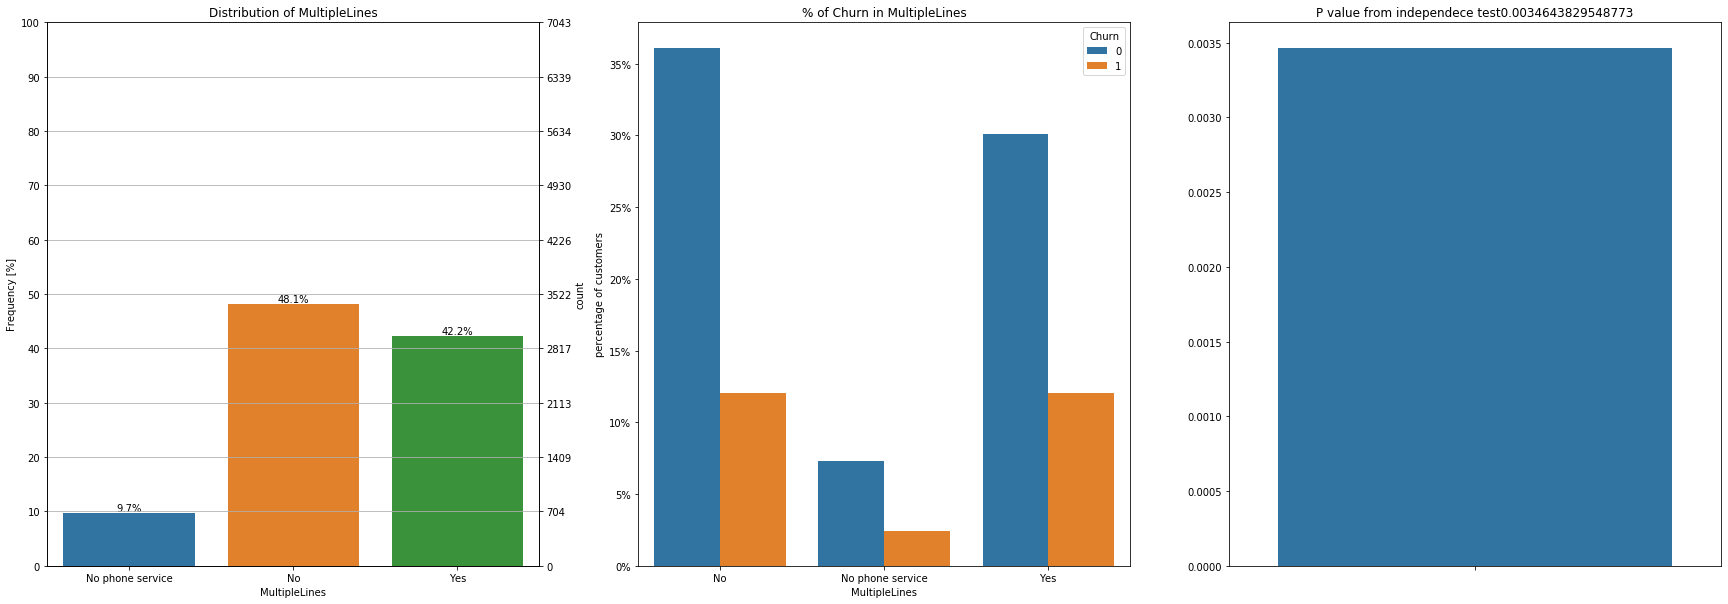

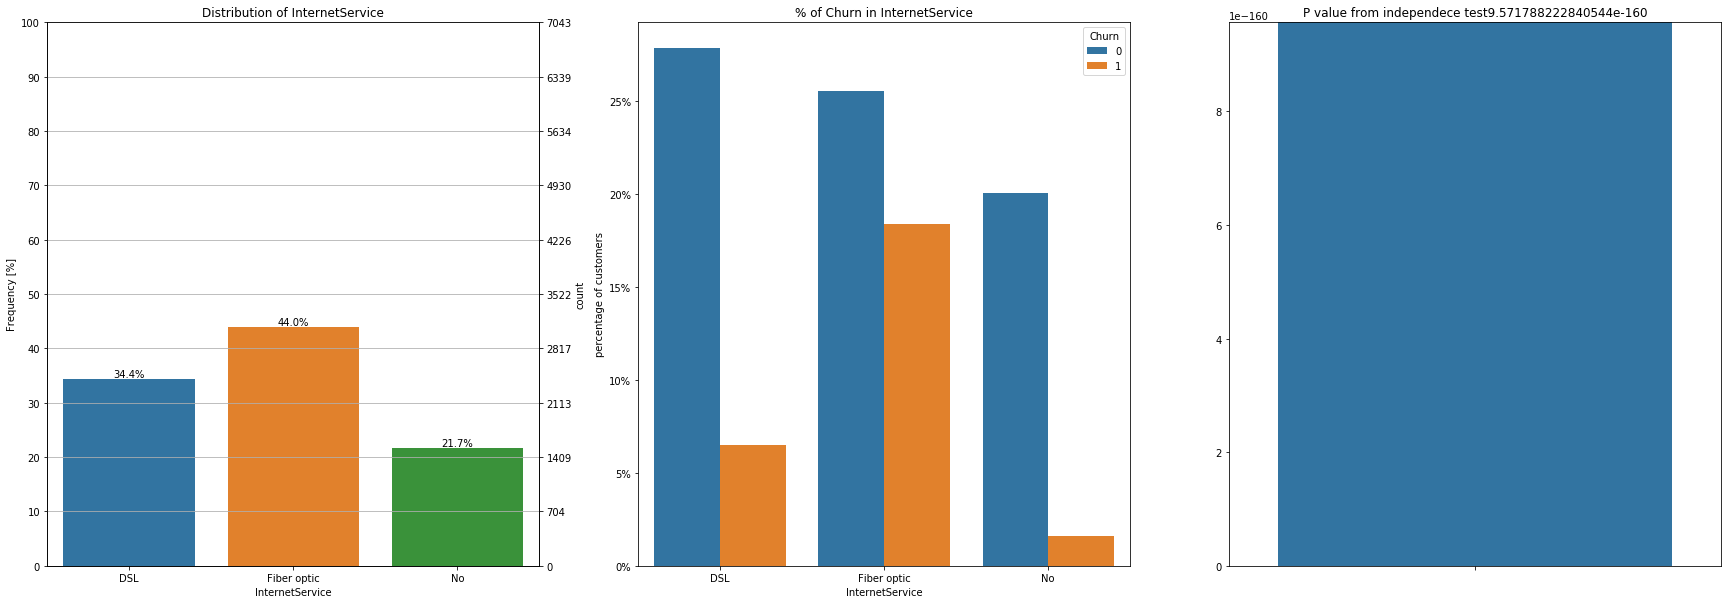

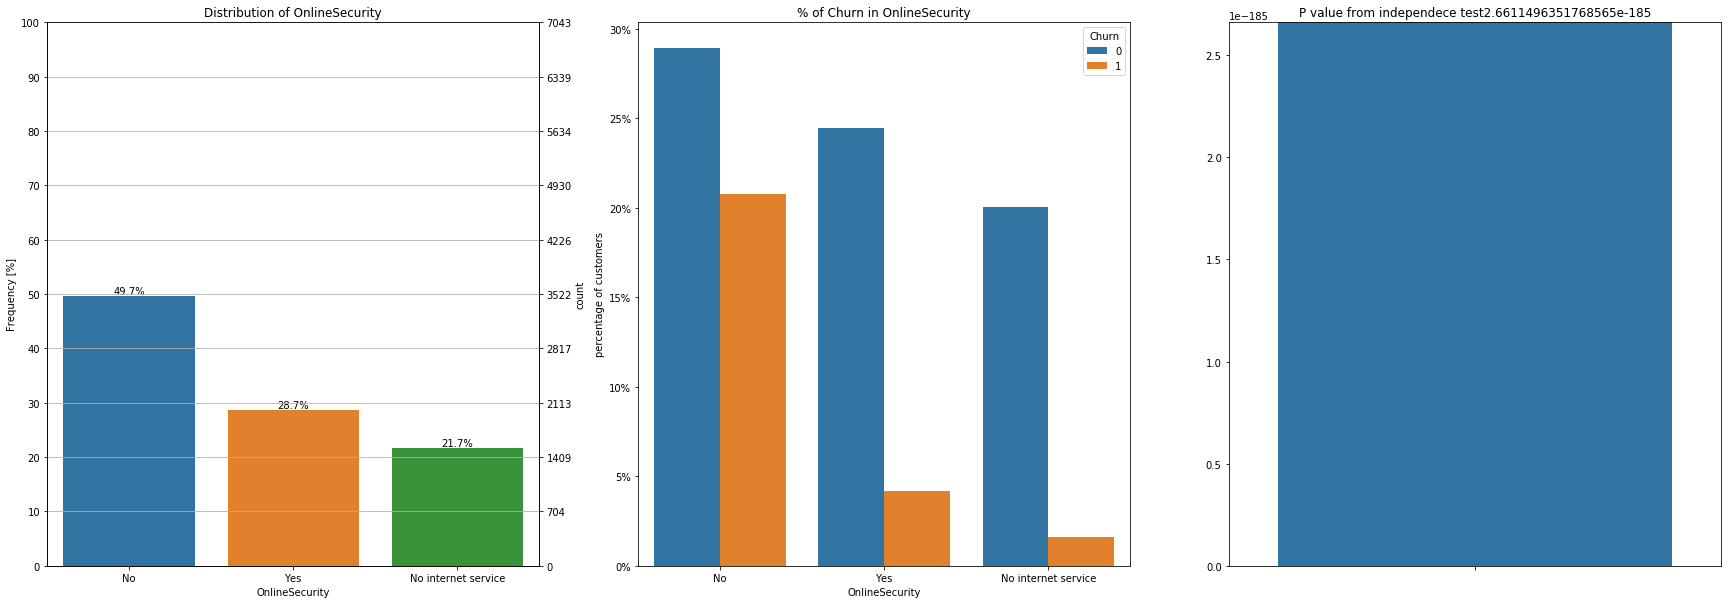

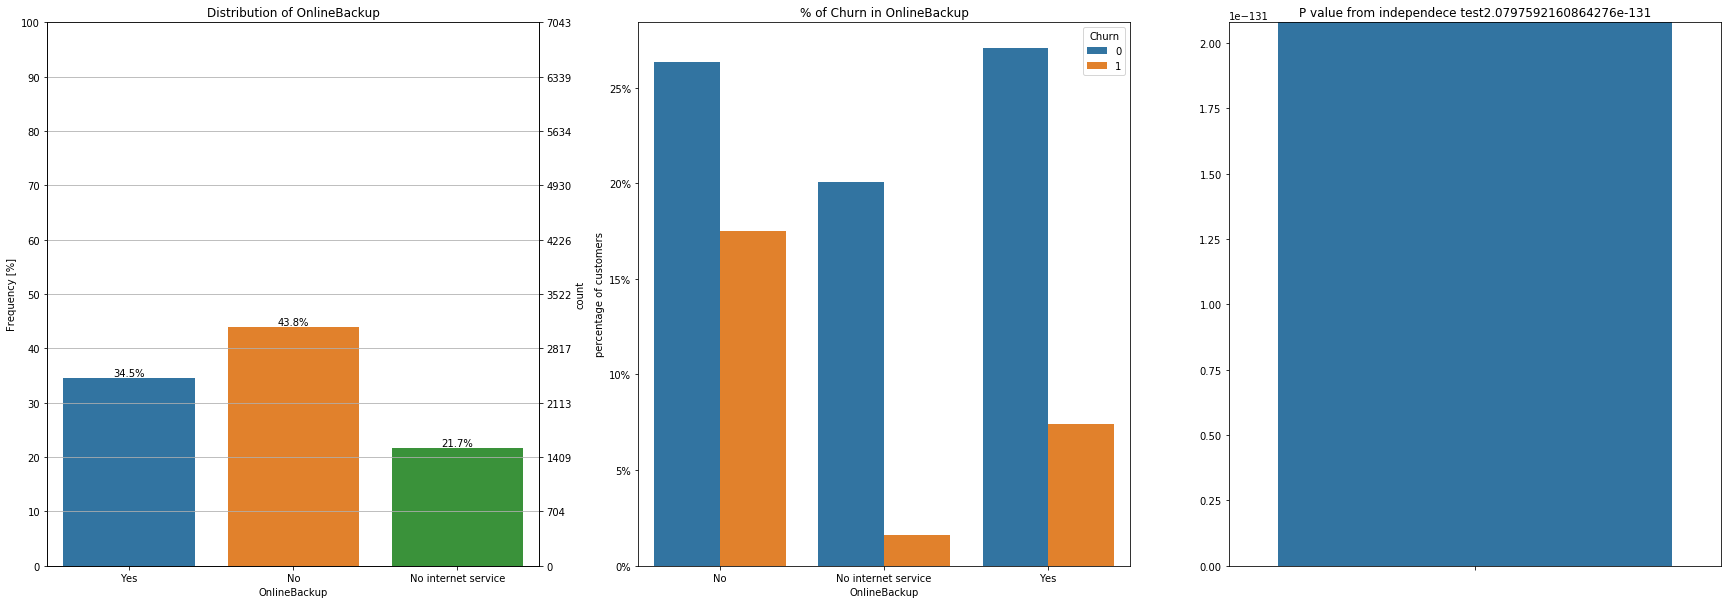

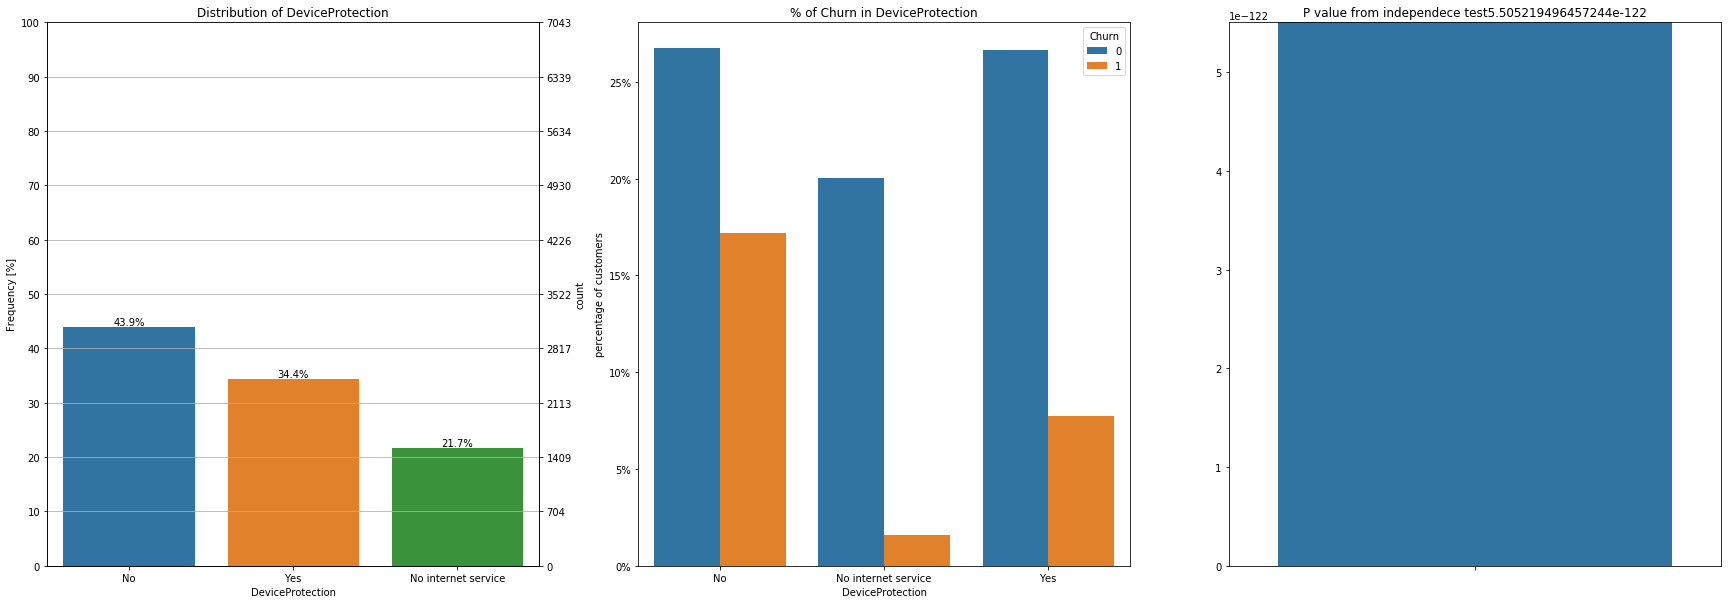

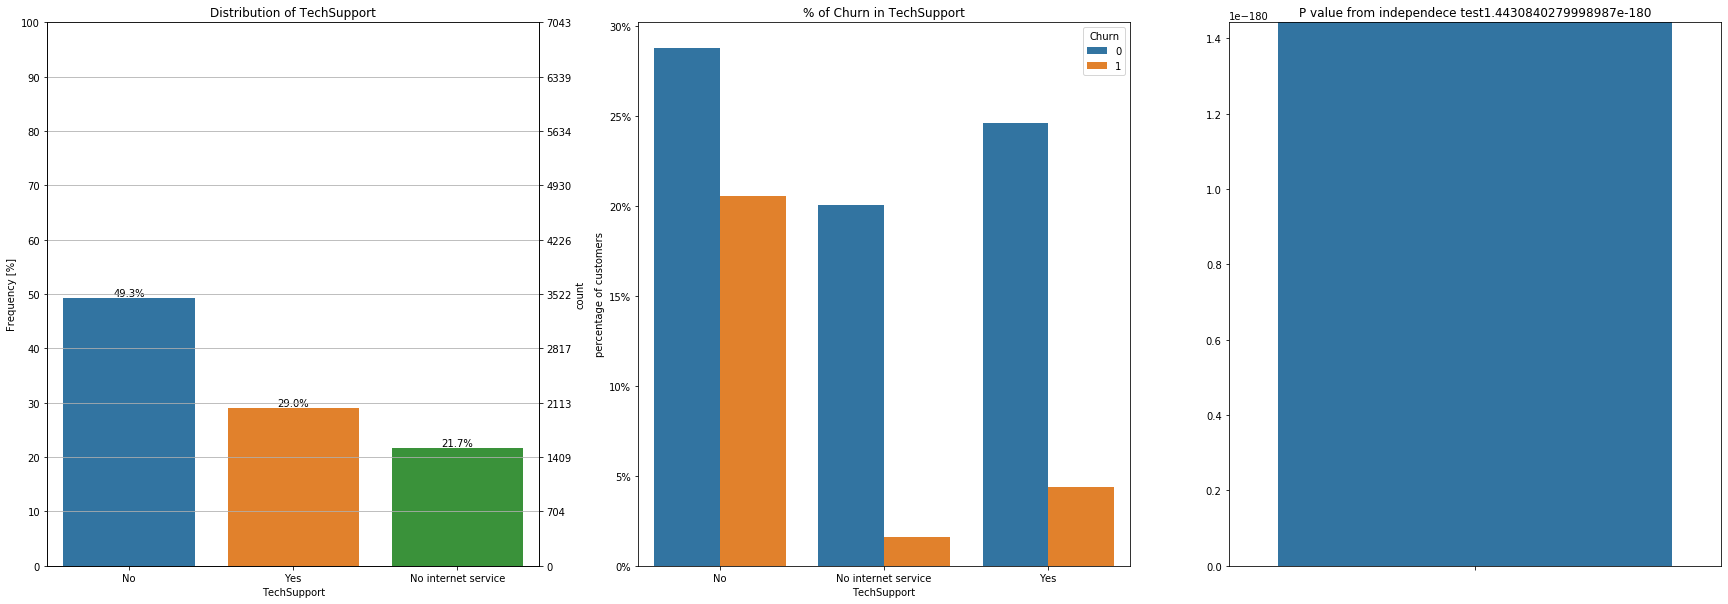

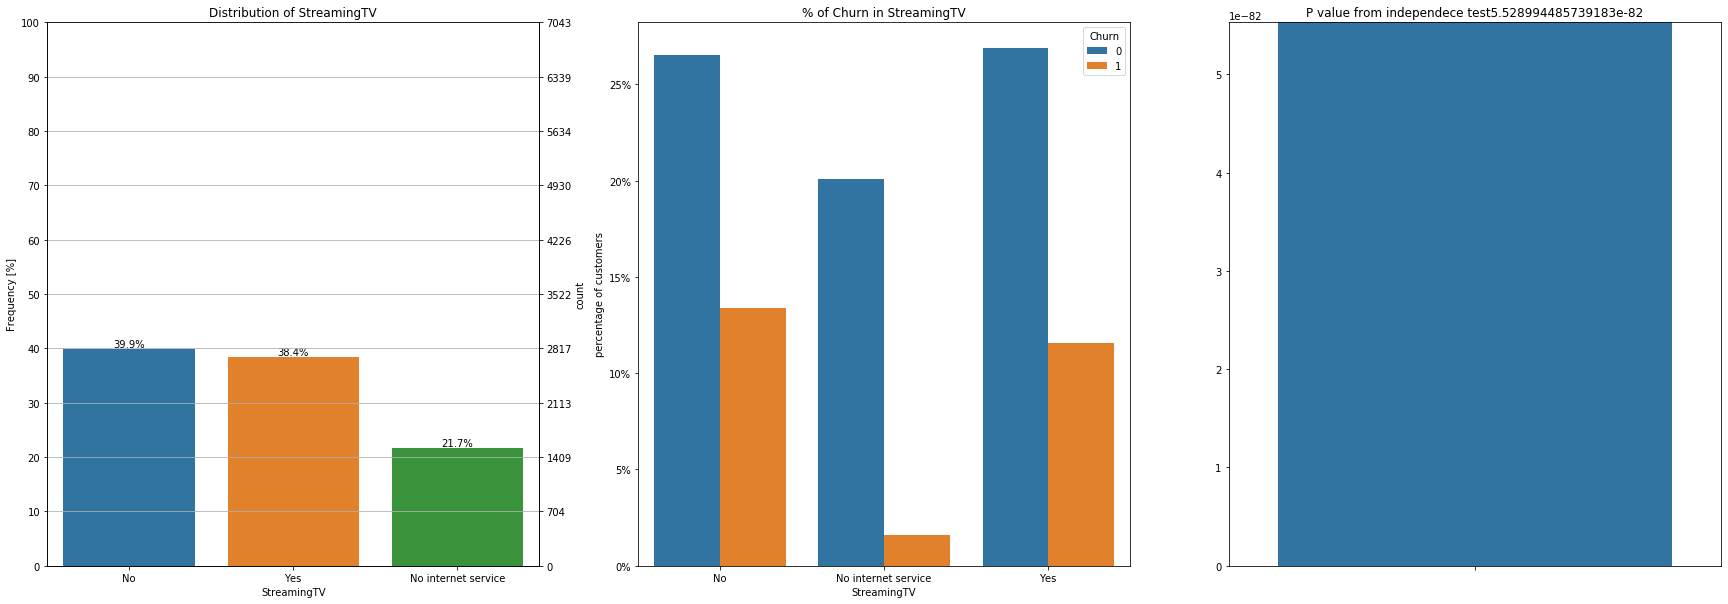

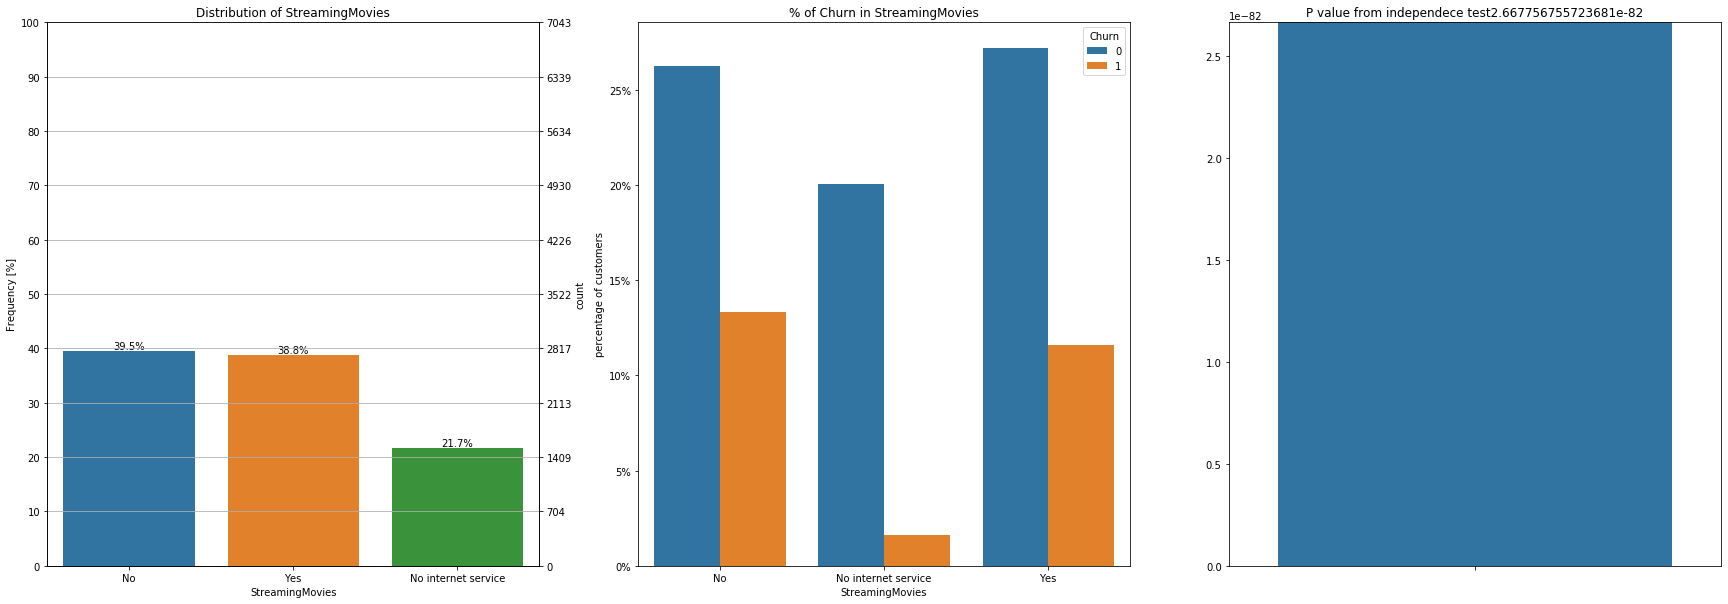

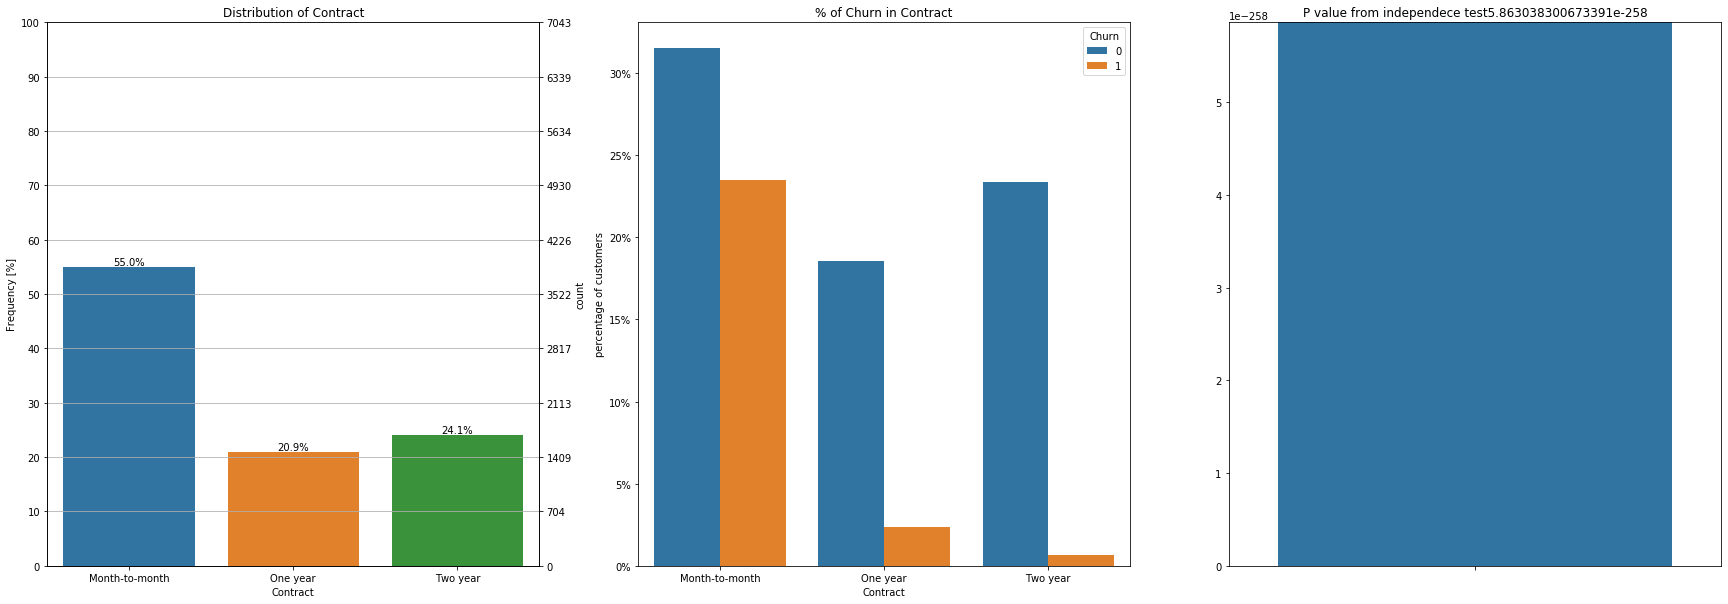

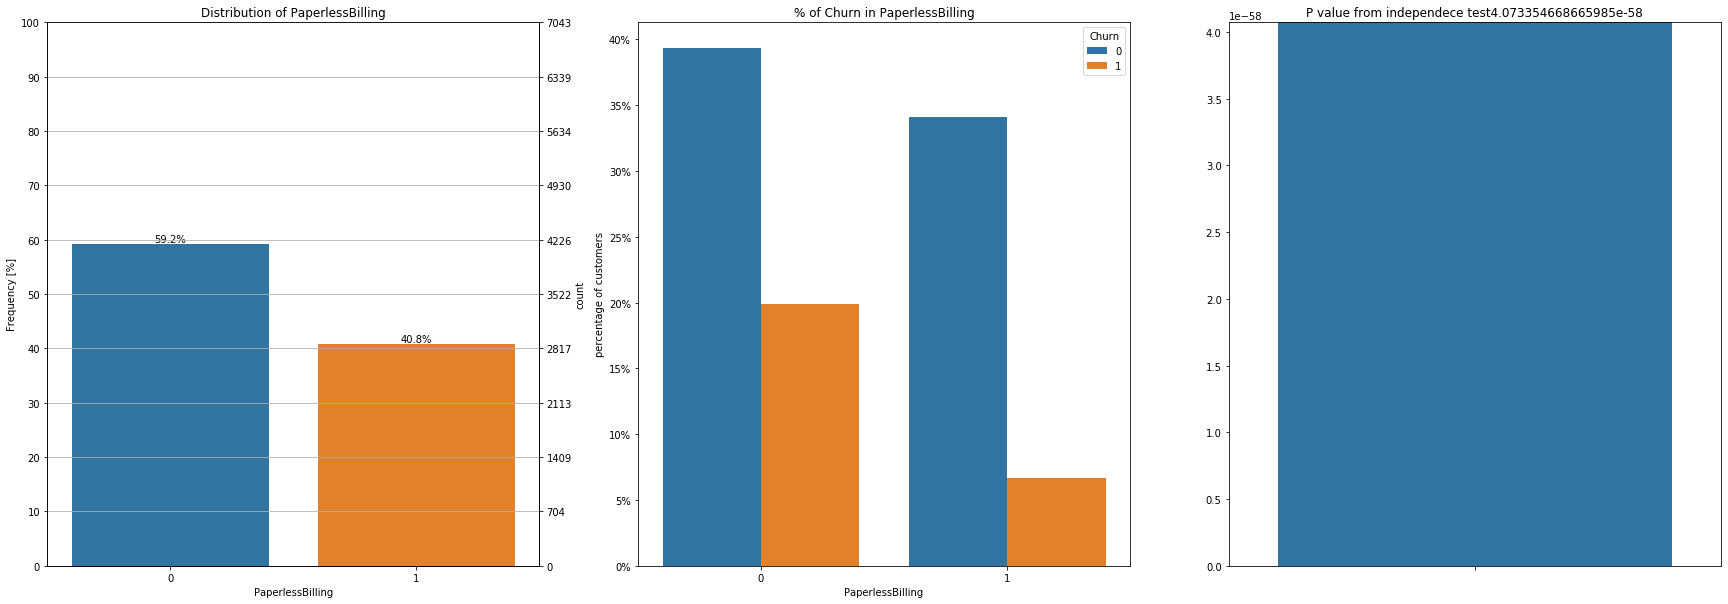

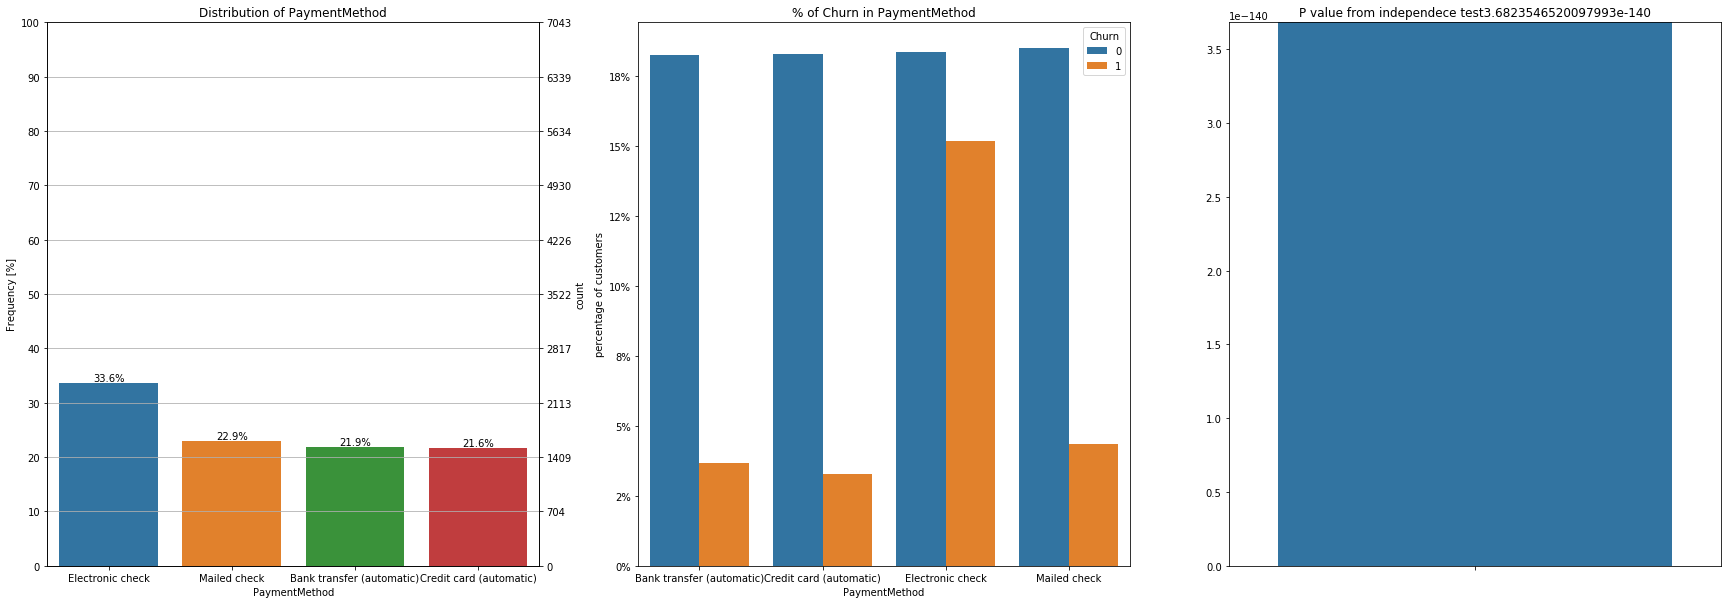

In [140]:
categoricalVariablesSummary(df,df[cat_cols].drop(columns=['customerID','Churn'],axis=1).columns)

Best Hyper Parameters: {'max_features': 'log2', 'min_samples_leaf': 11, 'min_samples_split': 2, 'random_state': 123}
#############
Decision tree accuracy:78.0
Decision tree Precision:45.0
Decision tree Recall:59.0
Decision tree AUC:71.0
#############


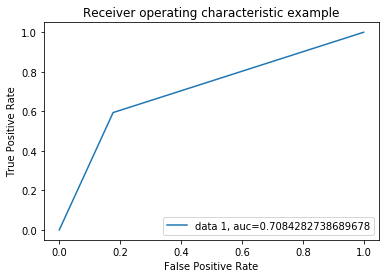

In [133]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()
params = {
          'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
x,y=df1[cat_cols2].drop(columns=['customerID','Churn'],axis=1), df1.Churn
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)
model = GridSearchCV(dtree, param_grid=params, n_jobs=-1, cv=3)
model.fit(x_train,y_train)
prediction= model.predict(x_test)


print("Best Hyper Parameters:",model.best_params_)
print("#############")
print("Decision tree accuracy:{}".format(round(metrics.accuracy_score(prediction,y_test)*100),6))
print("Decision tree Precision:{}".format(round(metrics.precision_score(prediction,y_test)*100),6))
print("Decision tree Recall:{}".format(round(metrics.recall_score(prediction,y_test)*100),6))
print("Decision tree AUC:{}".format(round(metrics.roc_auc_score(prediction,y_test)*100),6))
print("#############")
auc = metrics.roc_auc_score(prediction,y_test)
fpr, tpr, _ = metrics.roc_curve(prediction,y_test)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Best Hyper Parameters: {'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 200}
######Model performance Evaluation Metrics#######
Decision tree accuracy:78.0
Decision tree Precision:45.0
Decision tree Recall:61.0
Decision tree AUC:72.0
########ROC######


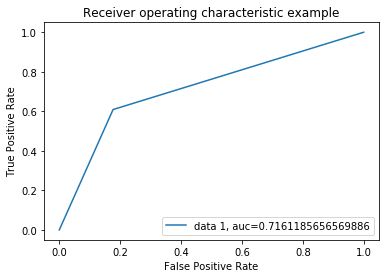

#############Feature Importance##########


,feature,importance
9,Contract_Month-to-month,0.127015
13,InternetService_Fiber optic,0.075515
28,TechSupport_No,0.073907
6,OnlineSecurity_No,0.068687
24,PaymentMethod_Electronic check,0.061435
11,Contract_Two year,0.049237
7,OnlineSecurity_Yes,0.036838
12,InternetService_DSL,0.035778
19,OnlineBackup_No,0.035579
10,Contract_One year,0.032523


In [141]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier()
params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
x,y=df1[cat_cols2].drop(columns=['customerID','Churn'],axis=1), df1.Churn
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)
model = GridSearchCV(rf, param_grid=params, n_jobs=-1, cv=3)
model.fit(x_train,y_train)
prediction= model.predict(x_test)


print("Best Hyper Parameters:",model.best_params_)
print("######Model performance Evaluation Metrics#######")
print("Decision tree accuracy:{}".format(round(metrics.accuracy_score(prediction,y_test)*100),6))
print("Decision tree Precision:{}".format(round(metrics.precision_score(prediction,y_test)*100),6))
print("Decision tree Recall:{}".format(round(metrics.recall_score(prediction,y_test)*100),6))
print("Decision tree AUC:{}".format(round(metrics.roc_auc_score(prediction,y_test)*100),6))
print("########ROC######")
auc = metrics.roc_auc_score(prediction,y_test)
fpr, tpr, _ = metrics.roc_curve(prediction,y_test)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print("#############Feature Importance##########")
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.best_estimator_.feature_importances_}).sort_values('importance', ascending = False)
fi  

######Model performance Evaluation Metrics#######
Decision tree accuracy:79.0
Decision tree Precision:51.0
Decision tree Recall:60.0
Decision tree AUC:72.0
########ROC######


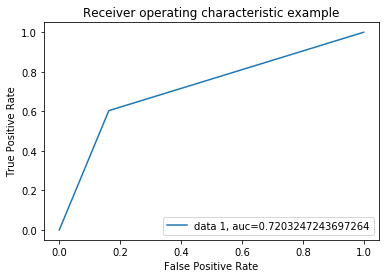

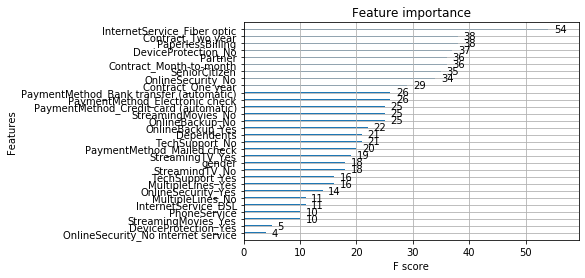

[0.00485946 0.00836436 0.01217047 0.00841465 0.00456251 0.01123359
 0.0620492  0.00599305 0.01106373 0.44312924 0.02227048 0.04131278
 0.01003328 0.08565094 0.         0.         0.00677928 0.00794932
 0.01212585 0.01911988 0.         0.01153015 0.00869613 0.
 0.05164169 0.00888916 0.01013247 0.01351867 0.05609157 0.00406794
 0.         0.00862731 0.02454793 0.         0.0111814  0.01399352
 0.        ]


{'Contract_Month-to-month': 17667.020873899994,
 'OnlineSecurity_No': 10222.0526191,
 'InternetService_Fiber optic': 17447.553543899998,
 'PaymentMethod_Electronic check': 6009.0895966,
 'TechSupport_No': 5148.512841400001,
 'Contract_One year': 6050.6161961,
 'OnlineBackup_No': 3475.347535,
 'StreamingTV_Yes': 2518.4629057,
 'StreamingMovies_Yes': 1459.8904847000001,
 'StreamingMovies_No': 2080.9705707000003,
 'PaperlessBilling': 12636.78842414,
 'DeviceProtection_No': 5371.091861499999,
 'Partner': 7380.048209359998,
 'SeniorCitizen': 9245.1501981,
 'InternetService_DSL': 2106.4857473800007,
 'Contract_Two year': 14592.835807899999,
 'Dependents': 5346.845282619999,
 'OnlineBackup_Yes': 3683.0872261000004,
 'PaymentMethod_Credit card (automatic)': 5071.4457099,
 'PaymentMethod_Bank transfer (automatic)': 5629.84377,
 'StreamingTV_No': 5490.282127,
 'MultipleLines_Yes': 1496.99696998,
 'PaymentMethod_Mailed check': 2507.4718660000003,
 'gender': 6144.6152003,
 'OnlineSecurity_Yes': 35

In [149]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(x_train,y_train)
prediction=model.predict(x_test)


#print("Best Hyper Parameters:",model.best_params_)
print("######Model performance Evaluation Metrics#######")
print("Decision tree accuracy:{}".format(round(metrics.accuracy_score(prediction,y_test)*100),6))
print("Decision tree Precision:{}".format(round(metrics.precision_score(prediction,y_test)*100),6))
print("Decision tree Recall:{}".format(round(metrics.recall_score(prediction,y_test)*100),6))
print("Decision tree AUC:{}".format(round(metrics.roc_auc_score(prediction,y_test)*100),6))
print("########ROC######")
auc = metrics.roc_auc_score(prediction,y_test)
fpr, tpr, _ = metrics.roc_curve(prediction,y_test)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#feature importance   (specifies cover)
plot_importance(model)
pyplot.show()
print(model.feature_importances_)

#feature importance   (gain)
model.get_booster().get_score(importance_type= 'total_cover')

######Model performance Evaluation Metrics#######
Decision tree accuracy:78.0
Decision tree Precision:51.0
Decision tree Recall:59.0
Decision tree AUC:71.0
########ROC######


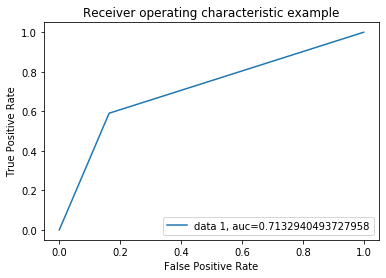

In [151]:
#Ada Boost
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200)
model.fit(x_train,y_train)
prediction=model.predict(x_test)


#print("Best Hyper Parameters:",model.best_params_)
print("######Model performance Evaluation Metrics#######")
print("Decision tree accuracy:{}".format(round(metrics.accuracy_score(prediction,y_test)*100),6))
print("Decision tree Precision:{}".format(round(metrics.precision_score(prediction,y_test)*100),6))
print("Decision tree Recall:{}".format(round(metrics.recall_score(prediction,y_test)*100),6))
print("Decision tree AUC:{}".format(round(metrics.roc_auc_score(prediction,y_test)*100),6))
print("########ROC######")
auc = metrics.roc_auc_score(prediction,y_test)
fpr, tpr, _ = metrics.roc_curve(prediction,y_test)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Best Hyper Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
######Model performance Evaluation Metrics#######
Decision tree accuracy:78.0
Decision tree Precision:48.0
Decision tree Recall:59.0
Decision tree AUC:71.0
########ROC######


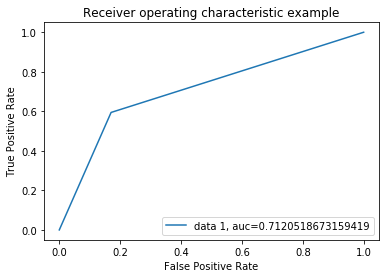

In [154]:
#SVM
from sklearn.svm import SVC
from matplotlib import pyplot

SVM = SVC()
params = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','poly']}  

x,y=df1[cat_cols2].drop(columns=['customerID','Churn'],axis=1), df1.Churn
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)
model = GridSearchCV(SVM, param_grid=params, n_jobs=-1, cv=3)
model.fit(x_train,y_train)
prediction= model.predict(x_test)


print("Best Hyper Parameters:",model.best_params_)
print("######Model performance Evaluation Metrics#######")
print("Decision tree accuracy:{}".format(round(metrics.accuracy_score(prediction,y_test)*100),6))
print("Decision tree Precision:{}".format(round(metrics.precision_score(prediction,y_test)*100),6))
print("Decision tree Recall:{}".format(round(metrics.recall_score(prediction,y_test)*100),6))
print("Decision tree AUC:{}".format(round(metrics.roc_auc_score(prediction,y_test)*100),6))
print("########ROC######")
auc = metrics.roc_auc_score(prediction,y_test)
fpr, tpr, _ = metrics.roc_curve(prediction,y_test)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


Best Hyper Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'uniform'}
######Model performance Evaluation Metrics#######
Decision tree accuracy:76.0
Decision tree Precision:44.0
Decision tree Recall:55.0
Decision tree AUC:69.0
########ROC######


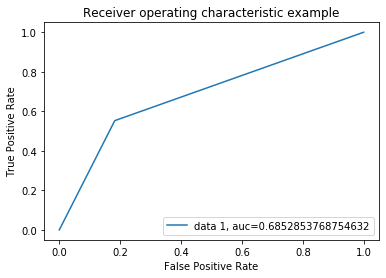

In [155]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

knn = KNeighborsClassifier()
params = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
              'weights': ['uniform','distance'], 
              'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}  

x,y=df1[cat_cols2].drop(columns=['customerID','Churn'],axis=1), df1.Churn
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)
model = GridSearchCV(knn, param_grid=params, n_jobs=-1, cv=3)
model.fit(x_train,y_train)
prediction= model.predict(x_test)


print("Best Hyper Parameters:",model.best_params_)
print("######Model performance Evaluation Metrics#######")
print("Decision tree accuracy:{}".format(round(metrics.accuracy_score(prediction,y_test)*100),6))
print("Decision tree Precision:{}".format(round(metrics.precision_score(prediction,y_test)*100),6))
print("Decision tree Recall:{}".format(round(metrics.recall_score(prediction,y_test)*100),6))
print("Decision tree AUC:{}".format(round(metrics.roc_auc_score(prediction,y_test)*100),6))
print("########ROC######")
auc = metrics.roc_auc_score(prediction,y_test)
fpr, tpr, _ = metrics.roc_curve(prediction,y_test)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

######Model performance Evaluation Metrics#######
Decision tree accuracy:78.0
Decision tree Precision:50.0
Decision tree Recall:60.0
Decision tree AUC:72.0
########ROC######


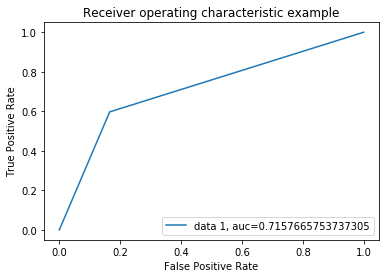

In [156]:
#Logistic
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

model = LogisticRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)


#print("Best Hyper Parameters:",model.best_params_)
print("######Model performance Evaluation Metrics#######")
print("Decision tree accuracy:{}".format(round(metrics.accuracy_score(prediction,y_test)*100),6))
print("Decision tree Precision:{}".format(round(metrics.precision_score(prediction,y_test)*100),6))
print("Decision tree Recall:{}".format(round(metrics.recall_score(prediction,y_test)*100),6))
print("Decision tree AUC:{}".format(round(metrics.roc_auc_score(prediction,y_test)*100),6))
print("########ROC######")
auc = metrics.roc_auc_score(prediction,y_test)
fpr, tpr, _ = metrics.roc_curve(prediction,y_test)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [158]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.437985
         Iterations: 35
                                                         Results: Logit
Model:                                    Logit                                Pseudo R-squared:                     0.251      
Dependent Variable:                       Churn                                AIC:                                  3126.2894  
Date:                                     2019-12-13 11:26                     BIC:                                  3255.7859  
No. Observations:                         3521                                 Log-Likelihood:                       -1542.1    
Df Model:                                 20                                   LL-Null:                              -2059.9    
Df Residuals:                             3500                                 LLR p-value:                          1.0174e-206
Converged:                                0.0000                               Scale:   

In [5]:
#categorical variables treatment
def categoricalTreatment(df,cols,type):
    if type=='OneHotEncoding':
        for x in cols:
            df[x]=df[x].astype('category',categories=df[x].unique())
            df = pd.concat([df,pd.get_dummies(df[x],prefix=x,drop_first=False)],axis=1) #drop_first=True
            df.drop([x],axis=1, inplace=True)
            
    if type=='NumericalEncoding':
        for x in cols:
            df[x]=df[x].astype('category',categories=df[x].unique()).cat.codes
            
            
            
    return df
        

In [114]:
def NumericalEDA(viz_type=None,rows=None,cols=None,data=None,column=[],label=None):
    if viz_type=='Histogram':
        fig=plt.figure(figsize=(20,60))
        fig.subplots_adjust(hspace=1,wspace=1)
        c=0
        for i in range(1,rows+1):
            if data[column[c]].isnull().any():
                data[column[c]]=data[column[c]].fillna(data[column[c]].mean())
            ax=fig.add_subplot(rows,cols,i)
            ax=sns.distplot(df[column[c]], fit=stats.norm)
            #ax.set(title=column[c])
            plt.legend(["Skew: {}, Kurt:{}".format(round(df[column[c]].skew(),2),round(df[column[c]].kurt(),2))])
            c+=1
        plt.show()
        
    if viz_type=='Heatmap':
        colormap = sns.diverging_palette(220, 10, as_cmap = True)
        corrmat=data[column].corr()
        f,ax=plt.subplots(figsize=(10,10))
        sns.heatmap(corrmat,cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
        plt.show()
    
                        
    if viz_type=='joint plot':
        corrmat=data.corr()
        f,ax=plt.subplots(figsize=(10,10))
        sns.heatmap(corrmat)
        plt.show()
        
        
    if viz_type=='pair plot':
        fig=plt.figure(figsize=(20,60))
        for i in range (1,rows+1):
            #plt.close()
            #fig.add_subplot(rows,cols,i)
            sns.jointplot(x=data[label], y=df[column[i-1]], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)
            plt.legend(["Pearson Coefficient: {}".format(pearsonr(df[label],df[column[i-1]])[0])])
        fig.subplots_adjust(hspace=1,wspace=1) 
        plt.show()
       

In [96]:
def categoricalEDA(df,what=None,data=None,num_columns=[],label=None,cat_columns=[],rows=None,cols=None):
    
    if what=='dependent_variable':
        anv_df=pd.DataFrame()
        anv_df['variables']=num_columns
        pvals=[]
        catval=[]
        for col in num_columns:
            catval=[]
            for j in df[label].unique():
                catval.append(df.loc[df[label]==j,col])
            pvals.append(stats.f_oneway(*catval)[1])
        anv_df['pval']=pvals
        anv_df['disparity']=np.log(1/anv_df['pval'].values)
        anv_df.sort_values('disparity',ascending=False,inplace=True)
        fig=plt.figure(figsize=(20,10))
        fig=sns.barplot(x=anv_df['variables'],y=anv_df['disparity'])
        plt.xticks(rotation=90)
        plt.show()
        
        
    if what=='independent_variable':
        anv_df=pd.DataFrame()
        anv_df['variables']=cat_columns
        
        pvals=[]
        catval=[]
        for col in cat_columns:
            catval=[]
            for j in df[col].unique():
                catval.append(df.loc[df[col]==j,num_columns[0]])
            #calculcate pvalue
            pvals.append(stats.f_oneway(*catval)[1])
        anv_df['pval']=pvals
        anv_df['disparity']=np.log(1/anv_df['pval'].values)
        anv_df.sort_values('disparity',ascending=False,inplace=True)
        fig=plt.figure(figsize=(20,10))
        fig=sns.barplot(x=anv_df['variables'],y=anv_df['disparity'])
        plt.xticks(rotation=90)
        plt.show()
        
        
            

In [15]:
#The following function looks at the following for categroical variables
#Distribution
#churn Prob amongst levels
#P value if the Chi-Squared independece test is valid

def categoricalVariablesSummary1(df,catcols):
    for x in catcols:
        fig=plt.figure(figsize=(30,10))
        ax=fig.add_subplot(1,1,1)
        axis_name="percentage of customers"
        ratios = pd.DataFrame()
        g = df.groupby([x])["Churn"].value_counts().to_frame()
        g = g.rename({"Churn": axis_name}, axis=1).reset_index()
        g[axis_name] = g[axis_name]/len(df)
        ax = sns.barplot(x=x, y= axis_name, hue='Churn', data=g)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        

def categoricalVariablesSummary(df,catcols):
    for col in catcols:
        fig=plt.figure(figsize=(30,10))
        
        #df[x].apply(str)
        
        ax=fig.add_subplot(1,3,1)
        ncount = len(df)

        ax = sns.countplot(x=col, data=df)
        plt.title('Distribution of {}'.format(col))
        plt.xlabel('{}'.format(col))

        # Make twin axis
        ax2=ax.twinx()

        # Switch so count axis is on right, frequency on left
        ax2.yaxis.tick_left()
        ax.yaxis.tick_right()

        # Also switch the labels over
        ax.yaxis.set_label_position('right')
        ax2.yaxis.set_label_position('left')

        ax2.set_ylabel('Frequency [%]')

        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                    ha='center', va='bottom') # set the alignment of the text

        # Use a LinearLocator to ensure the correct number of ticks
        ax.yaxis.set_major_locator(ticker.LinearLocator(11))

        # Fix the frequency range to 0-100
        ax2.set_ylim(0,100)
        ax.set_ylim(0,ncount)

        # And use a MultipleLocator to ensure a tick spacing of 10
        ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

        # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
        ax2.grid(None)
        
        ###########################################################################################################
        
        ax=fig.add_subplot(1,3,2)
        axis_name="percentage of customers"
        ratios = pd.DataFrame()
        g = df.groupby([col])["Churn"].value_counts().to_frame()
        g = g.rename({"Churn": axis_name}, axis=1).reset_index()
        g[axis_name] = g[axis_name]/len(df)
        ax = sns.barplot(x=col, y= axis_name, hue='Churn', data=g)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        plt.title('% of {} in {}'.format('Churn',col))
        plt.xlabel('{}'.format(col))
        
        ############################################################################################################
        
        ax=fig.add_subplot(1,3,3)
        
        crosstab = pd.crosstab(df[col], df['Churn'])
        if stats.chi2_contingency(crosstab)[1]<=0.05:
            ax=sns.barplot(stats.chi2_contingency(crosstab)[1], orient='v')
            plt.title('P value from independece test{}'.format(stats.chi2_contingency(crosstab)[1]))

        
        
        

Decision tree accuracy:0.7206132879045997
Confusion Metrix:
 [[2112  486]
 [ 498  426]]


In [37]:
cat_cols2.extend(num_cols)